# Initial Modeling Attempts for Coral Presence (Allen Coral Atlas) and Coral Bleaching (GCBD)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pickle

# Modeling Coral Bleaching from GCBD Data
Loading in data and getting in correct format

In [37]:
# df = pd.read_csv('./Full_GCBD_Meshed.csv')
# df.shape
df1 = pd.read_pickle('./Expanded_SST_with_features_fixed.pkl')
df1.columns

Index(['index', 'lat', 'long', 'Percent_Bleached_Sum', 'day', 'month', 'year',
       'sst_day_of_study', 'sst_max', 'sst_summer_max', 'sst_cv_max',
       'sst_cv_cnt', 'sst_abv_summer', 'sst_abv_summer_cumulative',
       'sst_cv_cnt_SumComp', 'sst_cv_max_SumComp', 'sur_refl_b08',
       'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12',
       'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16', 'Blue',
       'Green', 'Red', 'Near Infrared', 'Shortwave Infrared 1',
       'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh', 'AWEIsh', 'LSWI', 'MBWI',
       'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR', 'NDVIMNDWI', 'NDWI', 'NDWIns',
       'NWI', 'SWM', 'WI1', 'WI2', 'WRI', 'datetime_landsat',
       'datetime_landsat_offset', 'datetime'],
      dtype='object')

In [38]:
df1 = df1[['index','lat','long','Percent_Bleached_Sum','day','month','year','sur_refl_b08',
       'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12',
       'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16', 'Blue',
       'Green', 'Red', 'Near Infrared', 'Shortwave Infrared 1',
       'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh', 'AWEIsh', 'LSWI', 'MBWI',
       'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR', 'NDVIMNDWI', 'NDWI', 'NDWIns',
       'NWI', 'SWM', 'WI1', 'WI2', 'WRI', 'datetime_landsat',
       'datetime_landsat_offset', 'datetime']]

In [39]:
df_new = pd.read_csv('ModisDataFull.csv')
df_new = df_new.drop(['Percent_Bleached_Sum','day','month','year'],axis=1)
df_new=df_new.fillna(0)


In [40]:
dfM = pd.read_pickle('./dfGCBDModis.pkl')
dfM = dfM.drop(['Percent_Cover_Sum','Percent_Bleached_Sum','Latitude_Degrees','Longitude_Degrees','Date','time_span'],axis=1)
dfM.reset_index(inplace=True)
dfM=dfM.fillna(0)
#dfM.isna().sum()
#len(dfM[dfM.isna().any(axis=1)])
dfM = dfM.drop(['day','month','year'],axis=1)
dfM

,index,chlor_a,chlor_avg,chlor_change,chlor_max,chlor_min,nflh,nflh_avg,nflh_change,nflh_max,nflh_min,poc,poc_avg,poc_change,poc_max,poc_min
0,708,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,709,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2,711,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0
3,712,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0
4,713,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7324,38027,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0
7325,38028,0.0,0.23914,0.0,0.23914,0.23914,0.0,0.023,0.0,0.023,0.023,0.0,70.0,0.0,70.0,70.0
7326,38029,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0
7327,38030,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0


In [41]:
df1=pd.merge(df1,df_new,on='index',how='left')
df1=pd.merge(df1,dfM,on='index',how='left')
df1 = df1.drop_duplicates()
df1

,index,lat,long,Percent_Bleached_Sum,day,month,year,sur_refl_b08,sur_refl_b09,sur_refl_b10,...,nflh,nflh_avg,nflh_change,nflh_max,nflh_min,poc,poc_avg,poc_change,poc_max,poc_min
0,0,24.366926,124.003372,74.7,08,09,2016,975.0,915.0,877.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,24.483712,124.123192,74.7,01,10,2016,231.0,312.0,464.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,26.440547,127.777154,32.5,21,08,2013,372.0,371.0,419.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27,26.532637,128.074751,32.5,11,09,2016,340.0,332.0,337.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42,32.777267,132.870262,5.0,10,08,2016,494.0,367.0,359.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4748,38043,12.028167,-61.783111,0.0,18,03,2015,359.0,344.0,377.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4749,38044,12.045639,-61.764917,0.0,26,03,2015,138.0,141.0,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4750,38045,12.045639,-61.764917,0.0,26,03,2015,138.0,141.0,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4751,38046,12.041444,-61.770944,0.0,11,03,2015,297.0,250.0,227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
import plotly.express as px

fig = px.scatter_geo(df1,lat='lat',lon='long')
fig.update_layout(title = 'Distribution of Global Coral Bleaching Data', title_x=0.5)
fig.show()

In [35]:
tot = len(df1)
gbr=len(df1.loc[(((df1['long']> 142.69) & (df1['long']<180) & (df1['lat']>-28.7)&(df1['lat']<-10)))]) #GBR
car=len(df1.loc[((df1['long']> -100) & (df1['long']<-50) & (df1['lat']>5)&(df1['lat']<30))]) #CAR
scs = len(df1.loc[((df1['long']> 99) & (df1['long']<130) & (df1['lat']>-10)&(df1['lat']<15))]) #SCS
jpn = len(df1.loc[((df1['long']> 100) & (df1['long']<150) & (df1['lat']>15)&(df1['lat']<100))]) #SCS
print('Total:',tot)
print('GBR:',gbr)
print('CAR:',car)
print('SCS:',scs)
print('JPN:',jpn)

Total: 4753
GBR: 568
CAR: 1162
SCS: 1962
JPN: 273


In [135]:
#df = df1
#df = df1.loc[(((df1['long']> 142.69) & (df1['long']<153.7) & (df1['lat']>-28.7)&(df1['lat']<-10)))] #GBR
#df = df1.loc[(((df1['long']> 142.69) & (df1['long']<180) & (df1['lat']>-28.7)&(df1['lat']<-10)))] #GBR Expanded
#df = df1.loc[((df1['long']> 99) & (df1['long']<130) & (df1['lat']>-10)&(df1['lat']<15))]
df = df1.loc[((df1['long']> -85) & (df1['long']<-63) & (df1['lat']>17)&(df1['lat']<27))] #CAR
#df = df1.loc[((df1['long']> -85) & (df1['long']<-50) & (df1['lat']>15)&(df1['lat']<30))] #CAR Expanded

In [110]:
df.columns

Index(['index', 'lat', 'long', 'Percent_Bleached_Sum', 'day', 'month', 'year',
       'sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11',
       'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15',
       'sur_refl_b16', 'Blue', 'Green', 'Red', 'Near Infrared',
       'Shortwave Infrared 1', 'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh',
       'AWEIsh', 'LSWI', 'MBWI', 'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR',
       'NDVIMNDWI', 'NDWI', 'NDWIns', 'NWI', 'SWM', 'WI1', 'WI2', 'WRI',
       'datetime_landsat', 'datetime_landsat_offset', 'datetime', 'Unnamed: 0',
       'Latitude_Degrees', 'Longitude_Degrees', 'lat_Rnd', 'lon_Rnd',
       'sst_day_of_study', 'sst_max', 'sst_summer_max', 'sst_cv_max',
       'sst_cv_cnt', 'sst_abv_summer', 'sst_abv_summer_cumulative',
       'sst_cv_cnt_SumComp', 'sst_cv_max_SumComp', 'sst_dhw', 'sst_dhw_age',
       'chlor_a', 'chlor_avg', 'chlor_change', 'chlor_max', 'chlor_min',
       'nflh', 'nflh_avg', 'nflh_change', 'nflh_max',

In [136]:
# df = pd.read_pickle('./landsat_modis_merged.pkl')
coral_bleaching_cols = ['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10',
       'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14',
       'sur_refl_b15', 'sur_refl_b16', 'Blue',
       'Green', 'Red', 'Near Infrared', 'Shortwave Infrared 1',
       'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh', 'AWEIsh', 'LSWI', 'MBWI',
       'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR', 'NDVIMNDWI', 'NDWI', 'NDWIns',
       'NWI', 'SWM', 'WI1', 'WI2', 'WRI', 'datetime_landsat',
                        'sst_day_of_study', 'sst_max', 'sst_summer_max', 'sst_cv_max',
       'sst_cv_cnt', 'sst_abv_summer', 'sst_abv_summer_cumulative',
       'sst_dhw','sst_dhw_age',
        'sst_cv_cnt_SumComp', 'sst_cv_max_SumComp', 'datetime',
       'chlor_a', 'chlor_avg', 'chlor_change', 'chlor_max', 'chlor_min',
       'nflh', 'nflh_avg', 'nflh_change', 'nflh_max', 'nflh_min', 'poc',
       'poc_avg', 'poc_change', 'poc_max', 'poc_min',
       'Percent_Bleached_Sum']
df_bleaching = df[coral_bleaching_cols]

In [112]:
from math import ceil
def train_test_split_sorted(X, y, test_size, dates):
    """
    Function to perform temporal train test split 
    """
    n_test = ceil(test_size * len(X))

    sorted_index = [x for _, x in sorted(zip(np.array(dates), np.arange(0, len(dates))), key=lambda pair: pair[0])]
    train_idx = sorted_index[:-n_test]
    test_idx = sorted_index[-n_test:]

    if isinstance(X, (pd.Series, pd.DataFrame)):
        X_train = X.iloc[train_idx]
        X_test = X.iloc[test_idx]
    else:
        X_train = X[train_idx]
        X_test = X[test_idx]
    if isinstance(y, (pd.Series, pd.DataFrame)):
        y_train = y.iloc[train_idx]
        y_test = y.iloc[test_idx]
    else:
        y_train = y[train_idx]
        y_test = y[test_idx]

    return X_train, X_test, y_train, y_test

Splitting data into train, validation, test. This **is** a temporal train/test split because this dataset contains multiple observations in the same location over time

In [46]:
X_train, X_test, y_train, y_test = train_test_split_sorted(df_bleaching.drop(['Percent_Bleached_Sum'], axis=1), df_bleaching['Percent_Bleached_Sum'] / 100, 0.2, df_bleaching['datetime'])
X_train, X_val, y_train, y_val = train_test_split_sorted(X_train, y_train, 0.20, X_train['datetime'])

X_train_year = X_train['datetime']
X_train = X_train.drop(['datetime', 'datetime_landsat'], axis=1)
X_val = X_val.drop(['datetime', 'datetime_landsat'], axis=1)
X_test = X_test.drop(['datetime', 'datetime_landsat'], axis=1)
len(X_train)

628

Training XGBoost Regression Model to predict "Percent Bleached"

In [47]:
from xgboost import XGBRegressor
xgb_bleaching = XGBRegressor(objective="reg:logistic", random_state=42, reg_alpha=.05, reg_lambda=.05, max_depth=10, n_estimators=400, learning_rate=0.1, early_stopping_rounds=10, eval_metric='rmse')
xgb_bleaching.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=10, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=0,
             num_parallel_tree=1, objective='reg:logistic', predictor='auto', ...)

Computing Mean Absolute Error

In [48]:
from sklearn.metrics import mean_absolute_error
print(f'Total Validation Mean Absolute Error = {mean_absolute_error(y_val, xgb_bleaching.predict(X_val)) * 100:.2f}%')
print(f'Low Bleaching Validation Mean Absolute Error = {mean_absolute_error(y_val[y_val<.2], xgb_bleaching.predict(X_val[y_val<.2])) * 100:.2f}%')
print(f'Moderate/Severe Bleaching Validation Mean Absolute Error = {mean_absolute_error(y_val[y_val>.2], xgb_bleaching.predict(X_val[y_val>.2])) * 100:.2f}%')

Total Validation Mean Absolute Error = 10.65%
Low Bleaching Validation Mean Absolute Error = 8.58%
Moderate/Severe Bleaching Validation Mean Absolute Error = 13.80%


In [49]:
for i in range(0,100,10):
    try:
        print(f'For Actual Bleaching >{i/100* 100:0.0f}%,',f'Validation Mean Absolute Error = {mean_absolute_error(y_val[y_val>(i/100)], xgb_bleaching.predict(X_val[y_val>(i/100)])) * 100:.2f}%','-',len(X_val[y_val>(i/100)]),'value(s)')
    except:
        print(f'No values above {i/100* 100:0.0f}%')

For Actual Bleaching >0%, Validation Mean Absolute Error = 11.12% - 139 value(s)
For Actual Bleaching >10%, Validation Mean Absolute Error = 12.14% - 94 value(s)
For Actual Bleaching >20%, Validation Mean Absolute Error = 13.80% - 63 value(s)
For Actual Bleaching >30%, Validation Mean Absolute Error = 13.74% - 39 value(s)
For Actual Bleaching >40%, Validation Mean Absolute Error = 16.25% - 25 value(s)
For Actual Bleaching >50%, Validation Mean Absolute Error = 23.65% - 12 value(s)
For Actual Bleaching >60%, Validation Mean Absolute Error = 33.28% - 7 value(s)
For Actual Bleaching >70%, Validation Mean Absolute Error = 51.86% - 3 value(s)
For Actual Bleaching >80%, Validation Mean Absolute Error = 52.67% - 2 value(s)
For Actual Bleaching >90%, Validation Mean Absolute Error = 53.61% - 1 value(s)


In [ ]:
pickle.dump(xgb_bleaching, open("./coral_presence_xgb_model_CAR.pkl", "wb"))

Looking at the distribution of the target variable "Percent Bleached"

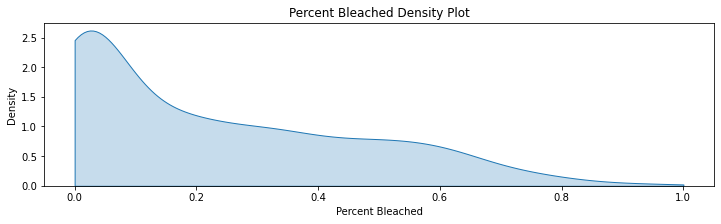

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 3)
sns.kdeplot(y_train, shade=True, label='Predicted', levels=5, clip=(0.0, 1.0))

plt.xlabel('Percent Bleached')
plt.ylabel('Density')
plt.title('Percent Bleached Density Plot')
plt.show()

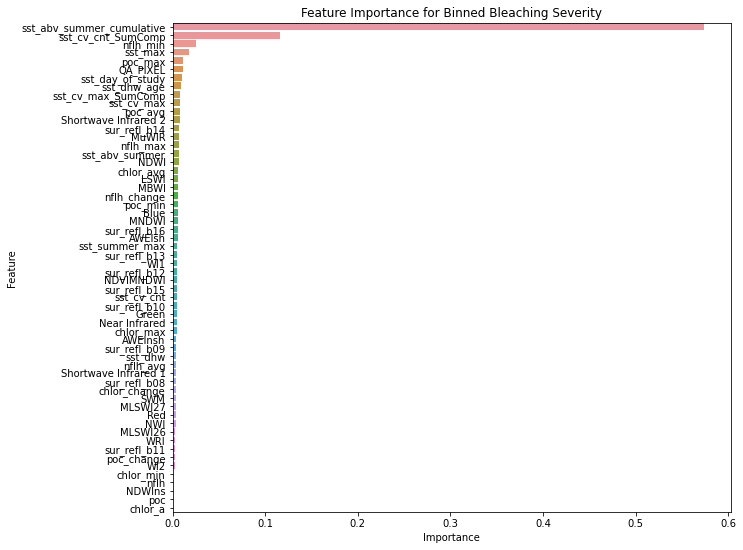

In [18]:
importance = xgb_bleaching.feature_importances_
features = X_train.columns
feature_importance = pd.DataFrame({'feature': features, 'importance': importance})
feature_importance = feature_importance.sort_values('importance', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(10, 9)
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Binned Bleaching Severity')
plt.show()

## Evaluating Performance of Model as Ranking Model

In [19]:
def k_percentile_accuracy(y_true, y_pred, k):
    """
    Function to compute the accuracy of ranking model predictions
    Input: labels, predictions, desired percentile (k-99)
    Output: Accuracy of rankings from percentile k to 99th percentile
    """
    k = k/100
    n_min = int(len(y_true) * k)
    n_max = len(y_true)
    indices = np.argsort(y_pred)[n_min:n_max]
    true_indices = np.argsort(y_true)[n_min:n_max]
    return len(set(indices) & set(true_indices)) / len(set(true_indices))

Computing ranking accuracy for the model in each decile of bleaching up to the 99th percentile (i.e., 10-99, 20-99, 30-99...) and comparing it with performance of a naive model with random rankings

In [20]:
# getting k_percentile accuracy for every 10th percentile
top_k_accs = {}
for k in range(0, 100, 20):
    top_k_accs[k] = k_percentile_accuracy(y_val, xgb_bleaching.predict(X_val), k)

# simulating what we could get for  top k accuracy by random chance over 1000 runs
import random
random.seed(42)
random_top_k_accs = {}
for run in range(1000):
    for k in range(0, 100, 20):
        random_top_k_accs[k] = random_top_k_accs.get(k, 0) + k_percentile_accuracy(y_val, np.random.rand(len(y_val)), k)

random_top_k_accs = {k: v / 1000 for k, v in random_top_k_accs.items()}

C:\Users\matjo\AppData\Local\Temp/ipykernel_25048/582163817.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  true_indices = np.argsort(y_true)[n_min:n_max]


Plotting the decile accuracy of the model vs random ranks to get an idea of the lift

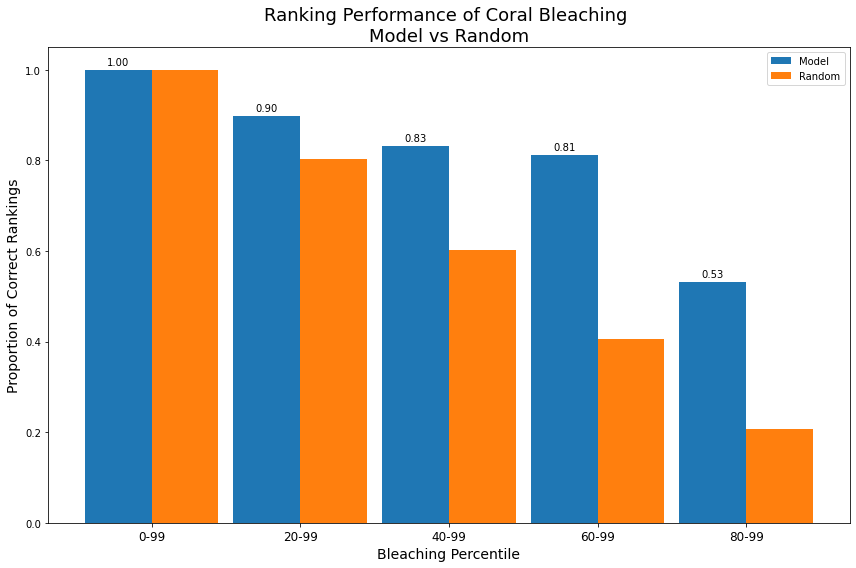

In [21]:
k = [x for x in list(top_k_accs.keys())]
top_k_accs_vals = list(top_k_accs.values())
random_top_k_accs = list(random_top_k_accs.values())
x = np.arange(len(k))
width = 0.45
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
rects1 = ax.bar(x - width/2, top_k_accs_vals, width, label='Model')
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
rects2 = ax.bar(x + width/2, random_top_k_accs, width, label='Random')
ax.set_ylabel('Proportion of Correct Rankings', fontsize=14)
ax.set_xlabel('Bleaching Percentile', fontsize=14)
ax.set_title('Ranking Performance of Coral Bleaching \nModel vs Random', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels([f'{val}-99' for  val in k], fontsize=12)
ax.legend()
fig.tight_layout()
plt.show()

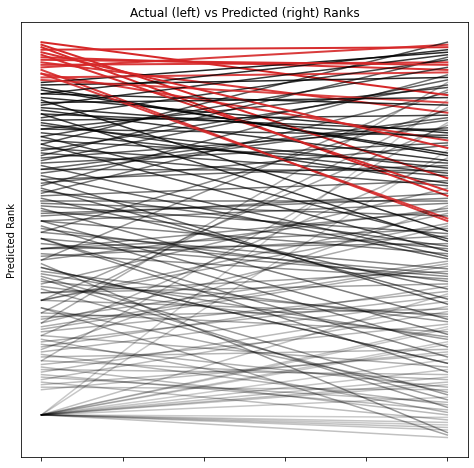

In [22]:
from math import exp

val_preds = xgb_bleaching.predict(X_val)

#preds_rank = val_preds.argsort().argsort()
val_rank = y_val.argsort().argsort()

df_ranks = pd.DataFrame(val_preds,columns=['P_ranks'])
df_ranks['P_ranks'] = df_ranks['P_ranks'].rank()
df_ranks['A_ranks'] = y_val.values
df_ranks['A_ranks'] = df_ranks['A_ranks'].rank()
df_ranks = df_ranks[['A_ranks','P_ranks']]

val_norm = val_rank/val_rank.max()
val_e_norm = .01*val_rank
val_e_norm = val_e_norm.apply(exp)
val_e_norm = val_e_norm/val_e_norm.max()

for i in df_ranks.index:
    if (val_norm.iloc[i] >.9):
        df_ranks.iloc[i].plot(kind='line',alpha=val_e_norm.iloc[i],color='tab:red', figsize=(8,8),linewidth=2, title='Actual (left) vs Predicted (right) Ranks')
    #elif (val_norm.iloc[i] >.8):
    #    ranks.iloc[i].plot(kind='line',alpha=val_norm.iloc[i],color='yellow')
    else: 
        df_ranks.iloc[i].plot(kind='line',alpha=val_e_norm.iloc[i],color='black',figsize=(8,8),ylabel='Predicted Rank')
    
plt.tick_params(left = False,labelleft=False,labelbottom=False)

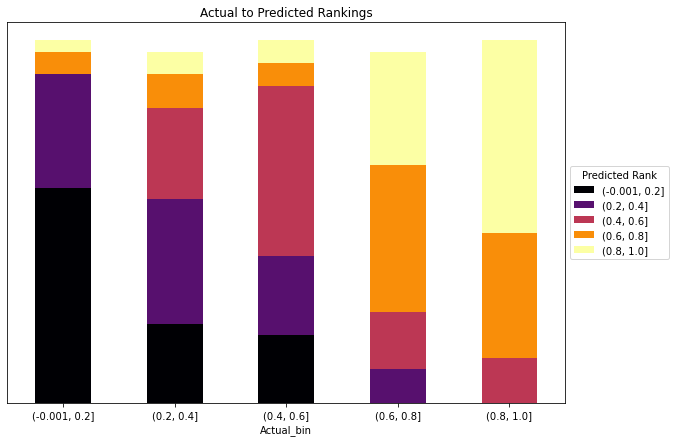

In [23]:
val_preds = xgb_bleaching.predict(X_val)

preds_rank = val_preds.argsort().argsort()
val_rank = y_val.argsort().argsort()

preds_norm = preds_rank/preds_rank.max()
val_norm = val_rank/val_rank.max()

rankings = np.array([val_norm, preds_norm]).transpose()

rank_comp = pd.DataFrame(rankings,columns = ['Actual','Predicted'])
rank_comp['Actual_bin'] = pd.cut(rank_comp['Actual'],bins=5)
rank_comp['Predicted'] = pd.cut(rank_comp['Predicted'],bins=5)

rank_comp = rank_comp.groupby(['Actual_bin','Predicted']).count().unstack('Predicted')
rank_comp.columns = rank_comp.columns.droplevel()

rank_comp.plot.bar(stacked=True,figsize=(10,7),title='Actual to Predicted Rankings', cmap="inferno").legend(title='Predicted Rank',loc='center left',bbox_to_anchor=(1,.5))
plt.tick_params(left = False, labelleft = False,rotation=0)

[Text(0.5, 1.0, 'Actual to Predicted Ranking Heatmap'),
 Text(0.5, 15.0, 'Predicted Bin'),
 Text(33.0, 0.5, 'Actual Bin')]

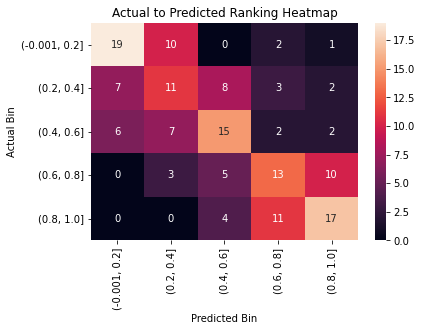

In [24]:
val_preds = xgb_bleaching.predict(X_val)

preds_rank = val_preds.argsort().argsort()
val_rank = y_val.argsort().argsort()

preds_norm = preds_rank/preds_rank.max()
val_norm = val_rank/val_rank.max()

rankings = np.array([val_norm, preds_norm]).transpose()

rank_comp = pd.DataFrame(rankings,columns = ['Actual','Predicted'])
rank_comp['Predicted'] = pd.cut(rank_comp['Predicted'],bins=5)
rank_comp['Actual_bin'] = pd.cut(rank_comp['Actual'],bins=5)
rank_comp = rank_comp.groupby(['Predicted','Actual_bin']).count().unstack('Predicted')
rank_comp.columns = rank_comp.columns.droplevel()
sns.heatmap(rank_comp, annot=True).set(title='Actual to Predicted Ranking Heatmap',xlabel='Predicted Bin',ylabel='Actual Bin')

Plotting the distribution of predictions on the validation set vs the distribution of percent bleaching for the validation set

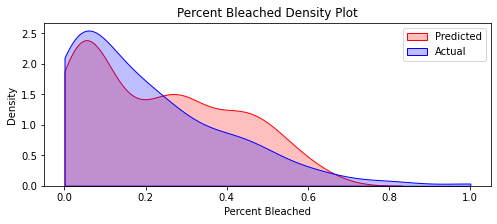

In [25]:
preds = xgb_bleaching.predict(X_val)
fig, ax = plt.subplots()
fig.set_size_inches(8, 3)
sns.kdeplot(preds, shade=True, label='Predicted', levels=5, clip=(0.0, 1.0), color='red')
sns.kdeplot(y_val, shade=True, label='Actual', levels=5, clip=(0.0, 1.0), color='blue')
plt.legend()
plt.xlabel('Percent Bleached')
plt.ylabel('Density')
plt.title('Percent Bleached Density Plot')
plt.show()


Plotting the distribution of percent bleaching in the training, validation, and test set (Drift??)

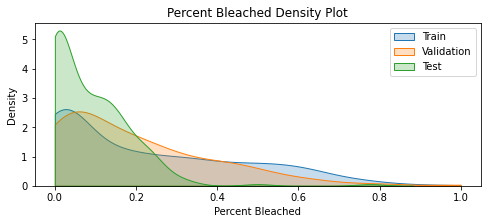

In [26]:
# plotting distribution of y_train and y_val and y_test
fig, ax = plt.subplots()
fig.set_size_inches(8, 3)
sns.kdeplot(y_train, shade=True, label='Train', levels=5, clip=(0.0, 1.0))
sns.kdeplot(y_val, shade=True, label='Validation', levels=5, clip=(0.0, 1.0))
sns.kdeplot(y_test, shade=True, label='Test', levels=5, clip=(0.0, 1.0))
plt.xlabel('Percent Bleached')
plt.ylabel('Density')
plt.title('Percent Bleached Density Plot')
plt.legend()
plt.show()

## Binning Bleaching Severity and Modeling as a Classification Problem
Binning percent bleached into three categories: low, moderate, and severe as shown in the figure

C:\Users\matjo\AppData\Local\Temp/ipykernel_20860/1600323954.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



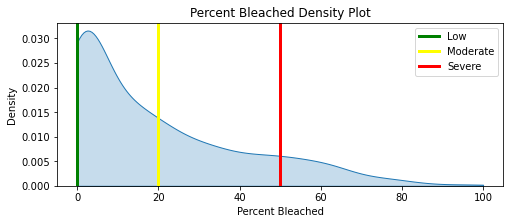

In [137]:
# binning percent bleached data into 3 bins
bins = [-.01,20,50, 100] # we use -0.01 to include 0.0 in the first bin
colors = ['green','yellow', 'red']
labels = ["Low", "Moderate","Severe"]
df_bleaching['Percent_Bleached_Binned'] = pd.cut(df_bleaching['Percent_Bleached_Sum'], bins=bins, labels=labels)
df_bleaching = df_bleaching.dropna()

#plotting the distrbution of percent_bleached_sum_x with the bins we created 
fig, ax = plt.subplots()
fig.set_size_inches(8, 3)
sns.kdeplot(df_bleaching['Percent_Bleached_Sum'], shade=True, levels=5, clip=(0.0, 100.0))

# plotting the bins
for i, bin in enumerate(bins):
    if i<3:
        plt.axvline(bin, color=colors[i], linestyle='-', alpha=1, linewidth=3, label=labels[i])
plt.legend()

plt.xlabel('Percent Bleached')
plt.ylabel('Density')
plt.title('Percent Bleached Density Plot')
plt.show()


Looking at the distribution of the binned classes (very imbalanced)

In [138]:
df_bleaching['Percent_Bleached_Binned'].value_counts()

Low         618
Moderate    249
Severe      116
Name: Percent_Bleached_Binned, dtype: int64

Performing **temporal train/validation/test split** and using SMOTE oversampling to handle class imbalance

In [139]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTEENN
from sklearn.impute import SimpleImputer

#Original
#features = ['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10',
#       'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14',
#       'sur_refl_b15', 'sur_refl_b16', 'Blue',
#       'Green', 'Red', 'Near Infrared', 'Shortwave Infrared 1',
#       'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh', 'AWEIsh', 'LSWI', 'MBWI',
#       'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR', 'NDVIMNDWI', 'NDWI', 'NDWIns',
#       'NWI', 'SWM', 'WI1', 'WI2', 'WRI', 'sst_day_of_study', 'sst_max', 'sst_summer_max', 'sst_cv_max',
#       'sst_cv_cnt', 'sst_abv_summer', 'sst_abv_summer_cumulative',
#       'sst_cv_cnt_SumComp', 'sst_cv_max_SumComp', 'datetime_landsat']

#Original + SCNP
features = ['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10',
       'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14',
       'sur_refl_b15', 'sur_refl_b16', 'Blue',
       'Green', 'Red', 'Near Infrared', 'Shortwave Infrared 1',
       'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh', 'AWEIsh', 'LSWI', 'MBWI',
       'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR', 'NDVIMNDWI', 'NDWI', 'NDWIns',
       'NWI', 'SWM', 'WI1', 'WI2', 'WRI', 'sst_day_of_study', 'sst_max', 'sst_summer_max', 'sst_cv_max',
       'sst_cv_cnt', 'sst_abv_summer', 'sst_abv_summer_cumulative',
            'sst_dhw','sst_dhw_age',
       'chlor_avg', 'chlor_change', 'chlor_max', 'chlor_min',
       'nflh_avg', 'nflh_change', 'nflh_max', 'nflh_min', 
       'poc_avg', 'poc_change', 'poc_max', 'poc_min',
       'sst_cv_cnt_SumComp', 'sst_cv_max_SumComp', 'datetime_landsat']

X = df_bleaching[features]
y = df_bleaching['Percent_Bleached_Binned']
y = y.replace({'Moderate':1,'Severe': 2, 'Low': 0})

X_train, X_test, y_train, y_test = train_test_split_sorted(X, y, test_size=0.2, dates=X['datetime_landsat'])
X_train, X_val, y_train, y_val = train_test_split_sorted(X_train, y_train, test_size=0.2, dates=X_train['datetime_landsat'])
X_train = X_train.drop(columns=['datetime_landsat'], axis=1)

features.remove('datetime_landsat')
X_train = X_train[features]
X_val = X_val[features]
X_test = X_test[features]

# oversampling to balance the data
sm = SMOTE(random_state=42, sampling_strategy='auto')
X_res, y_res = sm.fit_resample(X_train, y_train)

Examining distribution of percent bleached in the training set after SMOTE oversampling

In [116]:
y_res.value_counts()

0    178
1    178
2    178
Name: Percent_Bleached_Binned, dtype: int64

Training XGBoost classifier to predict binned category

In [140]:
from xgboost import XGBClassifier
xgb_bleaching_binned = XGBClassifier(n_estimators=400, max_depth=8, reg_lambda=1, reg_alpha=1)
xgb_bleaching_binned.fit(X_res, y_res, eval_set=[(X_val, y_val)], early_stopping_rounds=20, verbose=False)

C:\Users\matjo\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

Examining validation accuracy and confusion matrix

In [141]:
xgb_bleaching_binned.score(X_val, y_val)

0.5949367088607594

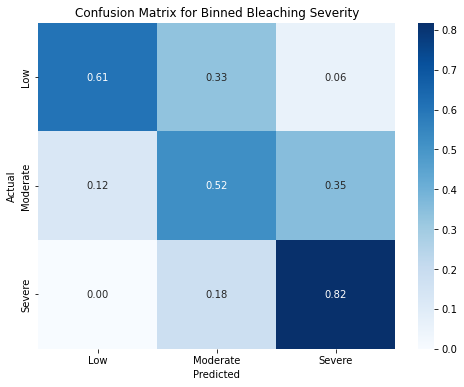

In [142]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = xgb_bleaching_binned.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
cm_rel = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.heatmap(cm_rel, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Binned Bleaching Severity')
plt.show()

#full SST+CNP dataset .2 val/.2 test val scores

## Binning to Two Buckets (Low or Moderate/Severe)

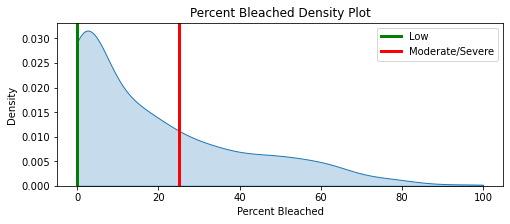

In [143]:
# binning percent bleached data into 3 bins
bins = [-.01,25, 100] # we use -0.01 to include 0.0 in the first bin
colors = ['green', 'red']
labels = ["Low", "Moderate/Severe"]
df_bleaching['Percent_Bleached_Binned'] = pd.cut(df_bleaching['Percent_Bleached_Sum'], bins=bins, labels=labels)
df_bleaching = df_bleaching.dropna()

#plotting the distrbution of percent_bleached_sum_x with the bins we created 
fig, ax = plt.subplots()
fig.set_size_inches(8, 3)
sns.kdeplot(df_bleaching['Percent_Bleached_Sum'], shade=True, levels=5, clip=(0.0, 100.0))

# plotting the bins
for i, bin in enumerate(bins):
    if i<2:
        plt.axvline(bin, color=colors[i], linestyle='-', alpha=1, linewidth=3, label=labels[i])
plt.legend()

plt.xlabel('Percent Bleached')
plt.ylabel('Density')
plt.title('Percent Bleached Density Plot')
plt.show()


Looking at the distribution of the binned classes (very imbalanced)

In [144]:
df_bleaching['Percent_Bleached_Binned'].value_counts()

Low                686
Moderate/Severe    297
Name: Percent_Bleached_Binned, dtype: int64

Performing **temporal train/validation/test split** and using SMOTE oversampling to handle class imbalance

In [145]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTEENN
from sklearn.impute import SimpleImputer

#Original
#features = ['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10',
#       'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14',
#       'sur_refl_b15', 'sur_refl_b16', 'Blue',
#       'Green', 'Red', 'Near Infrared', 'Shortwave Infrared 1',
#       'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh', 'AWEIsh', 'LSWI', 'MBWI',
#       'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR', 'NDVIMNDWI', 'NDWI', 'NDWIns',
#       'NWI', 'SWM', 'WI1', 'WI2', 'WRI', 'sst_day_of_study', 'sst_max', 'sst_summer_max', 'sst_cv_max',
#       'sst_cv_cnt', 'sst_abv_summer', 'sst_abv_summer_cumulative',
#       'sst_cv_cnt_SumComp', 'sst_cv_max_SumComp', 'datetime_landsat']

#Original + SCNP
features = ['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10',
       'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14',
       'sur_refl_b15', 'sur_refl_b16', 'Blue',
       'Green', 'Red', 'Near Infrared', 'Shortwave Infrared 1',
       'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh', 'AWEIsh', 'LSWI', 'MBWI',
       'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR', 'NDVIMNDWI', 'NDWI',
       'NWI', 'SWM', 'WI1', 'WI2', 'WRI', 'sst_day_of_study', 'sst_max', 'sst_summer_max', 'sst_cv_max',
       'sst_cv_cnt', 'sst_abv_summer', 'sst_abv_summer_cumulative',
       'sst_cv_cnt_SumComp', 'sst_cv_max_SumComp',
       'sst_dhw','sst_dhw_age',
       'chlor_avg', 'chlor_change',
       'nflh_avg', 'nflh_change', 'nflh_max', 'nflh_min',
       'poc_avg', 'poc_change', 'poc_max', 'poc_min',
       'datetime_landsat']

X = df_bleaching[features]
y = df_bleaching['Percent_Bleached_Binned']
y = y.replace({'Moderate/Severe': 1, 'Low': 0})

X_train, X_test, y_train, y_test = train_test_split_sorted(X, y, test_size=0.2, dates=X['datetime_landsat'])
X_train, X_val, y_train, y_val = train_test_split_sorted(X_train, y_train, test_size=0.2, dates=X_train['datetime_landsat'])
X_train = X_train.drop(columns=['datetime_landsat'], axis=1)

features.remove('datetime_landsat')
X_train = X_train[features]
X_val = X_val[features]
X_test = X_test[features]

# oversampling to balance the data
sm = SMOTE(random_state=42, sampling_strategy='auto')
X_res, y_res = sm.fit_resample(X_train, y_train)

Examining distribution of percent bleached in the training set after SMOTE oversampling

In [146]:
y_res.value_counts()

0    381
1    381
Name: Percent_Bleached_Binned, dtype: int64

Training XGBoost classifier to predict binned category

In [147]:
from xgboost import XGBClassifier
xgb_bleaching_binned = XGBClassifier(n_estimators=400, max_depth=8, reg_lambda=1, reg_alpha=1)
xgb_bleaching_binned.fit(X_res, y_res, eval_set=[(X_val, y_val)], early_stopping_rounds=20, verbose=False)

C:\Users\matjo\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Examining validation accuracy and confusion matrix

In [148]:
xgb_bleaching_binned.score(X_val, y_val)

0.759493670886076

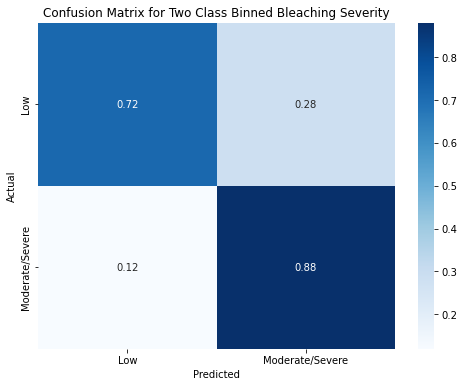

In [149]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = xgb_bleaching_binned.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
cm_rel = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.heatmap(cm_rel, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Two Class Binned Bleaching Severity')
plt.show()

#full SST+CNP dataset .2 val/.2 test val scores

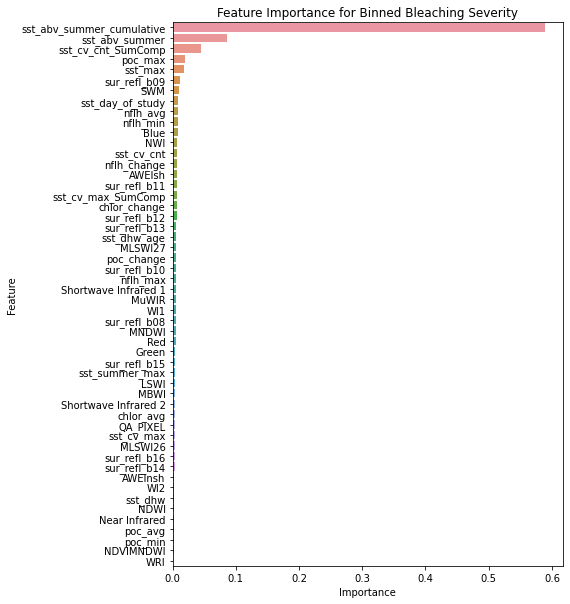

In [150]:
# plotting feature importance using seaborn horizntal bar plot ordered by importance
importance = xgb_bleaching_binned.feature_importances_
feature_importance = pd.DataFrame({'feature': features, 'importance': importance})
feature_importance = feature_importance.sort_values('importance', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(7, 10)
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Binned Bleaching Severity')
plt.show()

## SHAP Values

https://github.com/smazzanti/tds_black_box_models_more_explainable/blob/master/Shap2Probas.ipynb

In [131]:
def shap2deltaprob(features, 
                   shap_df, 
                   shap_sum,
                   probas,
                   func_shap2probas):
    '''
    map shap to Δ probabilities
    --- input ---
    :features: list of strings, names of features
    :shap_df: pd.DataFrame, dataframe containing shap values
    :shap_sum: pd.Series, series containing shap sum for each observation
    :probas: pd.Series, series containing predicted probability for each observation
    :func_shap2probas: function, maps shap to probability (for example interpolation function)
    --- output ---
    :out: pd.Series or pd.DataFrame, Δ probability for each shap value
    '''
    # 1 feature
    if type(features) == str or len(features) == 1:
        return probas - (shap_sum - shap_df[features]).apply(func_shap2probas)
    # more than 1 feature
    else:
        return shap_df[features].apply(lambda x: shap_sum - x).apply(func_shap2probas)\
                .apply(lambda x: probas - x)
    

def partial_deltaprob(feature, X, shap_df, shap_sum, probas, func_shap2probas,
                      cutoffs = None
                     ):
    '''
    return univariate analysis (count, mean and standard deviation) of shap values based on the original feature
    --- input ---
    :feature: str, name of feature
    :X: pd.Dataframe, shape (N, P)
    :shap_df: pd.DataFrame, shape (N, P)
    :shap_sum: pd.Series, series containing shap sum for each observation
    :probas: pd.Series, series containing predicted probability for each observation
    :func_shap2probas: function, maps shap to probability (for example interpolation function)
    :cutoffs: list of floats, cutoffs for numerical features
    --- output ---
    :out: pd.DataFrame, shape (n_levels, 3)
    '''
    dp_col = shap2deltaprob(feature, shap_df, shap_sum, probas, func_shap2probas)
    dp_col_mean = dp_col.mean()
    dp_col.name = 'DP_' + feature
    out = pd.concat([X[feature], dp_col], axis = 1)
    if cutoffs:
        intervals = pd.IntervalIndex.from_tuples(list(zip(cutoffs[:-1], cutoffs[1:])))
        out[feature] = pd.cut(out[feature], bins = intervals)
        out = out.dropna()   
    out = out.groupby(feature).describe().iloc[:, :3]
    out.columns = ['count', 'mean', 'std']
    out['std'] = out['std'].fillna(0)
    return out



Each row's features converted to SHAP values

In [152]:
from scipy.interpolate import interp1d
import shap

explainer = shap.TreeExplainer(xgb_bleaching_binned)
shap_values = explainer.shap_values(X_train)

C:\Users\matjo\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



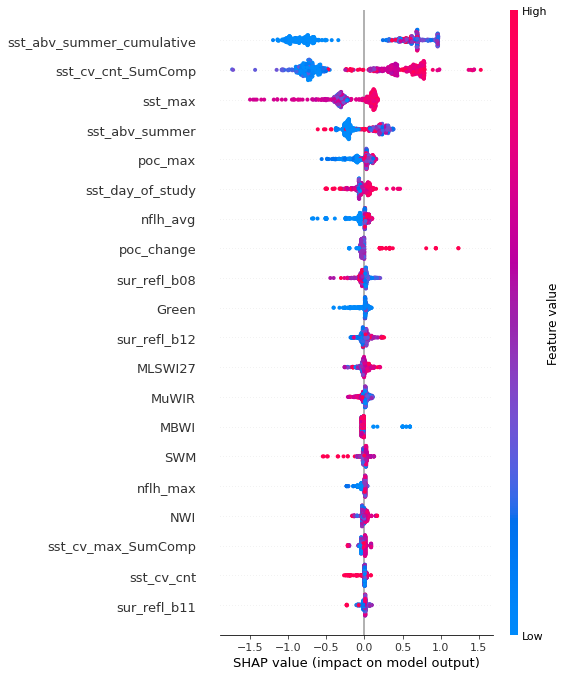

In [90]:
shap.summary_plot(shap_values,X_train)

In [96]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], X_val.iloc[1,:])

In [153]:
shap_df = pd.DataFrame(shap_values, columns = features, index=X_train.index)
shap_sum = shap_df.sum(axis=1)

temp = shap_df.head()
temp.style.apply(lambda x:["background:orangered" if v<0 else "background:lightgreen" for v in x], axis = 1)

,sur_refl_b08,sur_refl_b09,sur_refl_b10,sur_refl_b11,sur_refl_b12,sur_refl_b13,sur_refl_b14,sur_refl_b15,sur_refl_b16,Blue,Green,Red,Near Infrared,Shortwave Infrared 1,Shortwave Infrared 2,QA_PIXEL,AWEInsh,AWEIsh,LSWI,MBWI,MLSWI26,MLSWI27,MNDWI,MuWIR,NDVIMNDWI,NDWI,NWI,SWM,WI1,WI2,WRI,sst_day_of_study,sst_max,sst_summer_max,sst_cv_max,sst_cv_cnt,sst_abv_summer,sst_abv_summer_cumulative,sst_cv_cnt_SumComp,sst_cv_max_SumComp,sst_dhw,sst_dhw_age,chlor_avg,chlor_change,nflh_avg,nflh_change,nflh_max,nflh_min,poc_avg,poc_change,poc_max,poc_min
4514,-0.033365,0.000131,0.002119,-0.007715,-0.020279,-0.008138,0.001122,-0.013740,-0.003914,0.009401,0.010816,-0.000663,0.000000,0.000841,0.001583,-0.001687,0.000000,-0.012070,-0.000223,-0.035540,-0.001806,0.060591,-0.007938,0.009489,-0.000262,-0.000308,-0.033778,-0.012250,-0.000586,0.000000,0.000000,-0.048345,-0.362266,0.000000,0.003565,0.004925,-0.218204,-0.660201,-0.726340,-0.018474,-0.002449,-0.003287,0.000498,-0.000021,-0.055624,0.000503,-0.040894,0.000000,0.000000,-0.035749,-0.113780,0.000000
4698,0.062229,0.000131,0.001838,0.018325,0.026934,-0.007122,0.001122,-0.013740,-0.003914,0.006596,0.010745,-0.000627,0.000000,0.000739,0.002231,-0.001687,0.000000,-0.012141,-0.000601,-0.032468,-0.002585,0.044850,-0.007832,0.009111,-0.000262,0.001503,0.032659,0.030224,-0.000586,0.000000,0.000000,-0.033734,-0.230630,0.000000,-0.027795,0.004524,-0.202288,-1.025571,-0.862642,-0.024945,-0.001866,0.000043,0.001016,0.000075,-0.055624,-0.002413,0.008224,0.000000,0.000000,-0.035749,-0.050606,0.000000
4699,0.062229,0.000131,0.001838,0.018539,0.027606,-0.007122,0.000735,-0.013740,-0.003914,0.006596,0.009487,-0.000627,0.000000,0.000739,0.003911,-0.001687,0.000000,-0.012070,-0.002175,-0.032468,-0.000672,0.044437,0.015516,-0.018525,-0.000262,0.001503,0.032231,0.030224,-0.000941,0.000000,0.000000,-0.028387,-0.211960,0.000000,-0.027795,0.004005,-0.244347,-1.025571,-0.851435,-0.024945,-0.001866,0.000043,0.000019,0.001367,-0.055624,-0.002413,0.008224,0.000000,0.000000,-0.035749,-0.039399,0.000000
4700,0.047008,-0.000160,0.001838,0.017500,0.050384,-0.008381,0.000566,-0.013740,-0.003914,-0.012427,-0.043561,0.004279,0.000000,0.000841,0.003782,-0.006293,0.000000,0.004748,-0.043993,-0.032468,-0.001406,0.002369,-0.005200,-0.011203,0.000262,-0.010034,-0.030130,-0.018882,-0.000941,0.000000,0.000000,-0.069047,-0.284644,0.000000,-0.027795,0.004834,-0.200821,-0.776857,-0.738059,-0.020586,-0.002449,0.000043,0.000328,0.001272,-0.058379,0.000503,-0.030637,0.000000,0.000000,-0.036048,-0.026811,0.000000
4701,0.047008,-0.000160,0.001838,0.017500,0.050384,-0.008381,0.000566,-0.013740,-0.003914,-0.012427,-0.043561,0.004279,0.000000,0.000841,0.003782,-0.006293,0.000000,0.004748,-0.043993,-0.032468,-0.001406,0.002369,-0.005200,-0.011203,0.000262,-0.010034,-0.030130,-0.018882,-0.000941,0.000000,0.000000,-0.069047,-0.284644,0.000000,-0.027795,0.004834,-0.200821,-0.776857,-0.738059,-0.020586,-0.002449,0.000043,0.000328,0.001272,-0.058379,0.000503,-0.030637,0.000000,0.000000,-0.036048,-0.026811,0.000000


Each SHAP value is converted to a percent likelihood 

In [154]:
probas = pd.Series(xgb_bleaching_binned.predict_proba(X_train)[:,1],index=X_train.index)

shap_sum_sort = shap_sum.sort_values()
probas_sort = probas[shap_sum_sort.index]

intp = interp1d(shap_sum_sort,
                probas_sort, 
                bounds_error = False, 
                fill_value = (0, 1))

temp = shap2deltaprob(X_train.columns.to_list(),
                      shap_df,
                      shap_sum,
                      probas,
                      func_shap2probas=intp).head()\
        .applymap(lambda x:('+'if x>0 else '')+str(round(x*100,2))+'%')

temp.style.apply(lambda x: ["background:orangered" if float(v[:-1])<0 else "background:lightgreen"
                                for v in x], axis = 1)

C:\Users\matjo\anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:630: RuntimeWarning:

invalid value encountered in true_divide



,sur_refl_b08,sur_refl_b09,sur_refl_b10,sur_refl_b11,sur_refl_b12,sur_refl_b13,sur_refl_b14,sur_refl_b15,sur_refl_b16,Blue,Green,Red,Near Infrared,Shortwave Infrared 1,Shortwave Infrared 2,QA_PIXEL,AWEInsh,AWEIsh,LSWI,MBWI,MLSWI26,MLSWI27,MNDWI,MuWIR,NDVIMNDWI,NDWI,NWI,SWM,WI1,WI2,WRI,sst_day_of_study,sst_max,sst_summer_max,sst_cv_max,sst_cv_cnt,sst_abv_summer,sst_abv_summer_cumulative,sst_cv_cnt_SumComp,sst_cv_max_SumComp,sst_dhw,sst_dhw_age,chlor_avg,chlor_change,nflh_avg,nflh_change,nflh_max,nflh_min,poc_avg,poc_change,poc_max,poc_min
4514,-0.27%,+8.58%,+8.58%,-0.06%,-0.17%,-0.07%,+8.58%,-0.11%,-0.03%,+8.58%,+8.58%,-0.01%,0.0%,+8.58%,+8.58%,-0.01%,0.0%,-0.1%,-0.0%,-0.29%,-0.01%,+8.58%,-0.06%,+8.58%,-0.0%,-0.0%,-0.28%,-0.1%,-0.0%,0.0%,0.0%,-0.39%,-3.3%,0.0%,+8.58%,+8.58%,-1.87%,-6.8%,-7.67%,-0.15%,-0.02%,-0.03%,+8.58%,-0.0%,-0.45%,+8.58%,-0.33%,0.0%,0.0%,-0.29%,-0.94%,0.0%
4698,+8.58%,+8.58%,+8.58%,+8.58%,+8.58%,-0.06%,+8.58%,-0.11%,-0.03%,+8.58%,+8.58%,-0.01%,0.0%,+8.58%,+8.58%,-0.01%,0.0%,-0.1%,-0.0%,-0.26%,-0.02%,+8.58%,-0.06%,+8.58%,-0.0%,+8.58%,+8.58%,+8.58%,-0.0%,0.0%,0.0%,-0.28%,-1.99%,0.0%,-0.23%,+8.58%,-1.73%,-12.16%,-9.62%,-0.2%,-0.02%,+8.58%,+8.58%,+8.58%,-0.45%,-0.02%,+8.58%,0.0%,0.0%,-0.29%,-0.41%,0.0%
4699,+8.58%,+8.58%,+8.58%,+8.58%,+8.58%,-0.06%,+8.58%,-0.11%,-0.03%,+8.58%,+8.58%,-0.01%,0.0%,+8.58%,+8.58%,-0.01%,0.0%,-0.1%,-0.02%,-0.26%,-0.01%,+8.58%,+8.58%,-0.15%,-0.0%,+8.58%,+8.58%,+8.58%,-0.01%,0.0%,0.0%,-0.23%,-1.82%,0.0%,-0.23%,+8.58%,-2.13%,-12.16%,-9.45%,-0.2%,-0.02%,+8.58%,+8.58%,+8.58%,-0.45%,-0.02%,+8.58%,0.0%,0.0%,-0.29%,-0.32%,0.0%
4700,+8.58%,-0.0%,+8.58%,+8.58%,+8.58%,-0.07%,+8.58%,-0.11%,-0.03%,-0.1%,-0.36%,+8.58%,0.0%,+8.58%,+8.58%,-0.05%,0.0%,+8.58%,-0.36%,-0.26%,-0.01%,+8.58%,-0.04%,-0.09%,+8.58%,-0.08%,-0.25%,-0.15%,-0.01%,0.0%,0.0%,-0.56%,-2.52%,0.0%,-0.23%,+8.58%,-1.71%,-8.37%,-7.83%,-0.17%,-0.02%,+8.58%,+8.58%,+8.58%,-0.48%,+8.58%,-0.25%,0.0%,0.0%,-0.29%,-0.22%,0.0%
4701,+8.58%,-0.0%,+8.58%,+8.58%,+8.58%,-0.07%,+8.58%,-0.11%,-0.03%,-0.1%,-0.36%,+8.58%,0.0%,+8.58%,+8.58%,-0.05%,0.0%,+8.58%,-0.36%,-0.26%,-0.01%,+8.58%,-0.04%,-0.09%,+8.58%,-0.08%,-0.25%,-0.15%,-0.01%,0.0%,0.0%,-0.56%,-2.52%,0.0%,-0.23%,+8.58%,-1.71%,-8.37%,-7.83%,-0.17%,-0.02%,+8.58%,+8.58%,+8.58%,-0.48%,+8.58%,-0.25%,0.0%,0.0%,-0.29%,-0.22%,0.0%


By looking at one feature, we can display how the change in that feature correspondes to the marginal increase in predicted probability of either class.

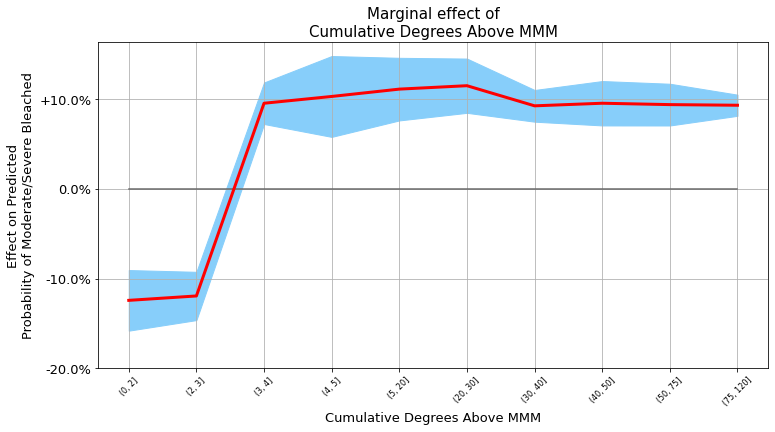

In [155]:
dp = partial_deltaprob('sst_abv_summer_cumulative', X_train, shap_df, shap_sum, probas
                       , func_shap2probas=intp,cutoffs = [0,2,3,4,5,20,30,40,50,75,120])

plt.figure(figsize=(12,6))
plt.plot([0,len(dp)-1],[0,0],color='dimgray',zorder=3)
plt.plot(range(len(dp)), dp['mean'], color = 'red', linewidth = 3, label = 'Avg effect',zorder=4)
plt.fill_between(range(len(dp)), dp['mean'] + dp['std'], dp['mean'] - dp['std'],
                 color = 'lightskyblue', label = 'Avg effect +- StDev',zorder=1)
yticks = list(np.arange(-.2,.20,.1))
plt.yticks(yticks, [('+' if y > 0 else '') + '{0:.1%}'.format(y) for y in yticks], fontsize=13)
plt.xticks(range(len(dp)), dp.index, fontsize=8,rotation=45)
plt.ylabel('Effect on Predicted\nProbability of Moderate/Severe Bleached',fontsize=13)
plt.xlabel('Cumulative Degrees Above MMM', fontsize=13)
plt.title('Marginal effect of\nCumulative Degrees Above MMM', fontsize=15)
#plt.gca().set_facecolor('lightyellow')

plt.grid(zorder=2)
plt.show()


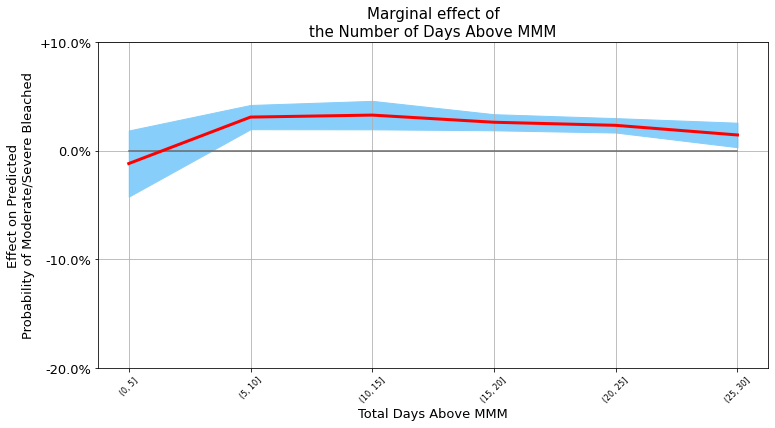

In [157]:
dp = partial_deltaprob('sst_abv_summer', X_train, shap_df, shap_sum, probas
                       , func_shap2probas=intp,cutoffs = [0,5,10,15,20,25,30])

plt.figure(figsize=(12,6))
plt.plot([0,len(dp)-1],[0,0],color='dimgray',zorder=3)
plt.plot(range(len(dp)), dp['mean'], color = 'red', linewidth = 3, label = 'Avg effect',zorder=4)
plt.fill_between(range(len(dp)), dp['mean'] + dp['std'], dp['mean'] - dp['std'],
                 color = 'lightskyblue', label = 'Avg effect +- StDev',zorder=1)
yticks = list(np.arange(-.2,.20,.1))
plt.yticks(yticks, [('+' if y > 0 else '') + '{0:.1%}'.format(y) for y in yticks], fontsize=13)
plt.xticks(range(len(dp)), dp.index, fontsize=8,rotation=45)
plt.ylabel('Effect on Predicted\nProbability of Moderate/Severe Bleached',fontsize=13)
plt.xlabel('Total Days Above MMM', fontsize=13)
plt.title('Marginal effect of\nthe Number of Days Above MMM', fontsize=15)
#plt.gca().set_facecolor('lightyellow')

plt.grid(zorder=2)
plt.show()


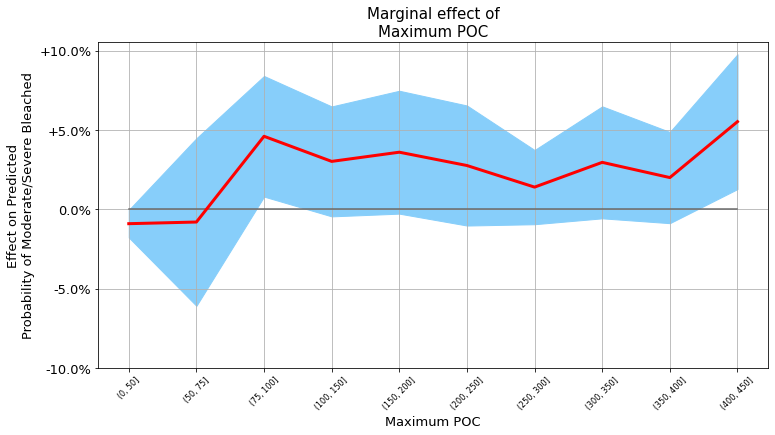

In [68]:
dp = partial_deltaprob('poc_max', X_train, shap_df, shap_sum, probas
                       , func_shap2probas=intp,cutoffs = [0,50,75,100,150,200,250,300,350,400,450])

plt.figure(figsize=(12,6))
plt.plot([0,len(dp)-1],[0,0],color='dimgray',zorder=3)
plt.plot(range(len(dp)), dp['mean'], color = 'red', linewidth = 3, label = 'Avg effect',zorder=4)
plt.fill_between(range(len(dp)), dp['mean'] + dp['std'], dp['mean'] - dp['std'],
                 color = 'lightskyblue', label = 'Avg effect +- StDev',zorder=1)
yticks = list(np.arange(-.1,.15,.05))
plt.yticks(yticks, [('+' if y > 0 else '') + '{0:.1%}'.format(y) for y in yticks], fontsize=13)
plt.xticks(range(len(dp)), dp.index, fontsize=8,rotation=45)
plt.ylabel('Effect on Predicted\nProbability of Moderate/Severe Bleached',fontsize=13)
plt.xlabel('Maximum POC', fontsize=13)
plt.title('Marginal effect of\nMaximum POC', fontsize=15)
#plt.gca().set_facecolor('lightyellow')

plt.grid(zorder=2)
plt.show()

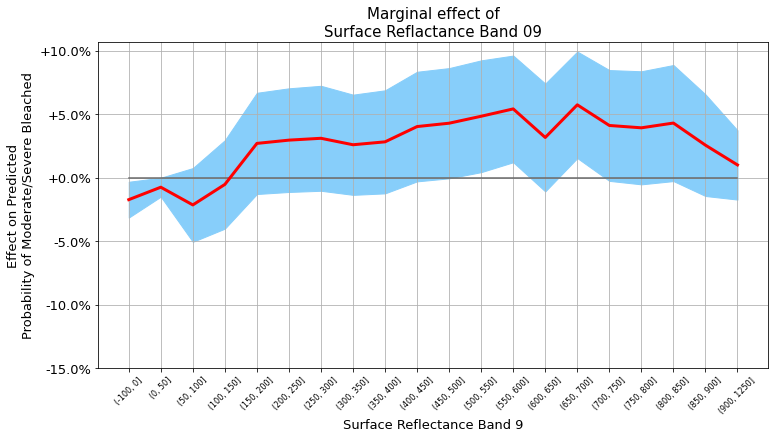

In [156]:
dp = partial_deltaprob('sur_refl_b09', X_train, shap_df, shap_sum, probas
                       , func_shap2probas=intp,cutoffs = [-100,0,50,100,150,200,250,300,350,400,450
                                                          ,500,550,600,650,700,750,800,850,900,1250])

plt.figure(figsize=(12,6))
plt.plot([0,len(dp)-1],[0,0],color='dimgray',zorder=3)
plt.plot(range(len(dp)), dp['mean'], color = 'red', linewidth = 3, label = 'Avg effect',zorder=4)
plt.fill_between(range(len(dp)), dp['mean'] + dp['std'], dp['mean'] - dp['std'],
                 color = 'lightskyblue', label = 'Avg effect +- StDev',zorder=1)
yticks = list(np.arange(-.15,.15,.05))
plt.yticks(yticks, [('+' if y > 0 else '') + '{0:.1%}'.format(y) for y in yticks], fontsize=13)
plt.xticks(range(len(dp)), dp.index, fontsize=8,rotation=45)
plt.ylabel('Effect on Predicted\nProbability of Moderate/Severe Bleached',fontsize=13)
plt.xlabel('Surface Reflectance Band 9', fontsize=13)
plt.title('Marginal effect of\nSurface Reflactance Band 09', fontsize=15)
#plt.gca().set_facecolor('lightyellow')

plt.grid(zorder=2)
plt.show()

## Percision & Recall

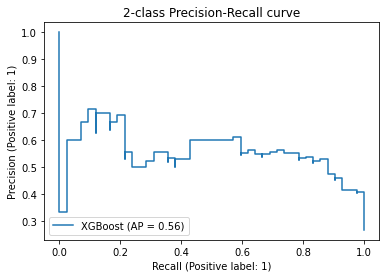

In [133]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    xgb_bleaching_binned, X_val, y_val, name="XGBoost"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<AxesSubplot:>

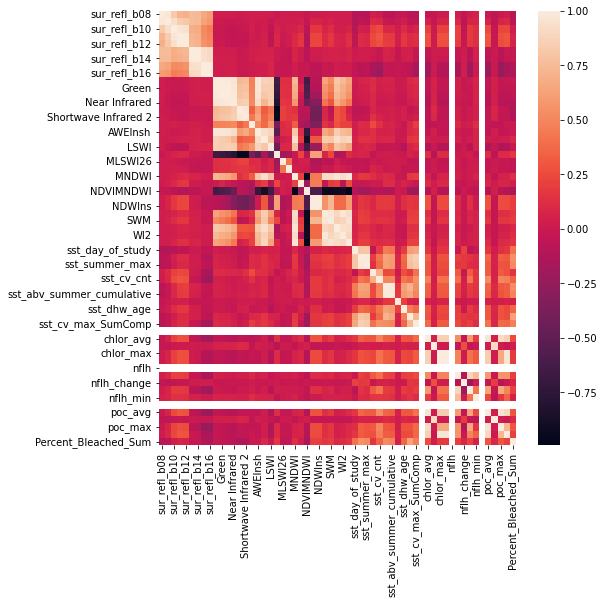

In [138]:
df_bleaching_corr = df_bleaching#.drop(columns=['chlor_a','poc','nflh'])
cor = df_bleaching_corr.corr()
plt.figure(figsize=(8,8))
sns.heatmap(cor,annot=False)